In [16]:
%%capture
!pip install -U matplotlib
import matplotlib.pyplot as plt
import numpy as np;

/var/folders/ww/qt0f4brd6dq8hp1wkttfj8fr0000gn/T/ipykernel_28760/1994807173.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = fig.gca(projection='3d')


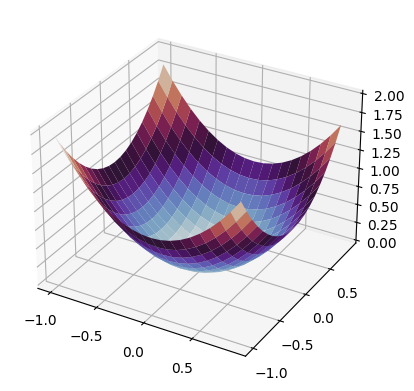

In [29]:
def objective(x, y):
    return x**2.0 + y**2.0

# range for input
r_min, r_max = -1.0, 1.0

# sample the input range uniformly in increments of 0.1
x_axis = y_axis = np.arange(r_min, r_max, 0.1)

# create a mesh from the axis
x, y = np.meshgrid(x_axis, y_axis)

# compute targets
results = objective(x, y)

# create a surface plot with the 'twilight' color scheme
fig = plt.figure()
axis = fig.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='twilight')

# show the plot
plt.show()

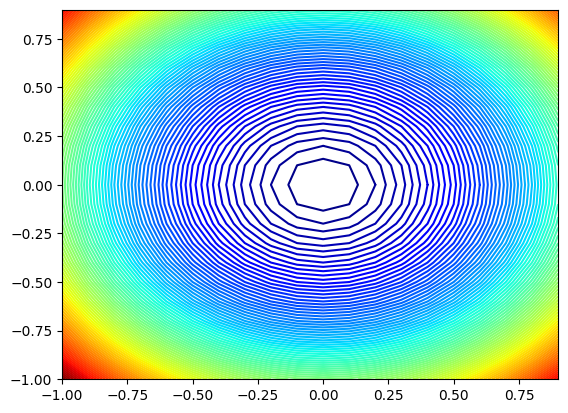

In [33]:
# define the range for the input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly in increments of 0.1
x_axis = y_axis = np.arange(bounds[0, 0], bounds[0, 1], 0.1)

# create a mesh from the axis
x, y = np.meshgrid(x_axis, y_axis)

# compute targets
results = objective(x, y)

# create a filled contour plot with 100 levels and the 'twilight' color scheme
plt.contour(x, y, results, levels=100, cmap='jet')
plt.show()

In [34]:
# Adam
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

def derivative_of_objective(x, y):
    return np.asarray([2.0 * x, 2.0 * y])

# gradient descent algo with adam for optimization
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an intial input
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])

    # initiliaze first and second moments
    m = v = [0.0 for _ in np.range(bounds.shape[0])]
    for it in range(n_iter):
        # calcualte the gradient
        g = derivative(x[0], x[1])

        # build a solution one variable at a time
        for i in range(x.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2.0
            m_hat = m[i] / (1.0 - beta1**it+1)
            v_hat = v[i] / (1.0 - beta2**it+1)
            x[i] = x[i] - alpha * m_hat / (sqrt(v_hat) + eps)
        score_new = objective(x[0], x[1])

        # report progress
        print(f">{it} f({x}) -> {score_new}")
    return [x, score]

# seed the pseudo-random number generator
np.random.seed(1)

# define a range for the input